In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")
import plotly.graph_objects as go

In [3]:
# set number of columns in  pandas output
pd.set_option('display.max_columns', 100)

Data obtained from https://cancer.sanger.ac.uk/cosmic/download/cancer-mutation-census/v99/alldata-cmc under "Cancer Mutation Census". Downloaded CancerMutationCensus_AllData_Tsv_v99_GRCh37.tar

In [4]:
# df = pd.read_csv('cmc_export.tsv', sep='\t', nrows=100) # read first 100 rows
df = pd.read_csv('cmc_export.tsv', sep='\t', usecols=['GENE_NAME' ,'AA_MUT_START', 'AA_MUT_STOP', 'AA_WT_ALLELE_SEQ', 'AA_MUT_ALLELE_SEQ', 'Mutation AA', 'Mutation Description AA', 'MUTATION_SIGNIFICANCE_TIER'])
df

,GENE_NAME,Mutation AA,AA_MUT_START,AA_MUT_STOP,AA_WT_ALLELE_SEQ,AA_MUT_ALLELE_SEQ,Mutation Description AA,MUTATION_SIGNIFICANCE_TIER
0,PODN,p.N296K,296,296,N,K,Substitution - Missense,Other
1,PODN,p.R211C,211,211,R,C,Substitution - Missense,Other
2,PODN,p.L312=,312,312,L,L,Substitution - coding silent,Other
3,PODN,p.I380Sfs*55,380,380,I,SAAWSTCCCTATSCGSRASTHWPSRASSGCTRCTCTTTRWSACPVA...,Deletion - Frameshift,Other
4,PODN,p.V412M,412,412,V,M,Substitution - Missense,Other
...,...,...,...,...,...,...,...,...
5225809,AC011308.1,p.G9D,9,9,G,D,Substitution - Missense,Other
5225810,RPS17L,p.E75G,75,75,E,G,Substitution - Missense,Other
5225811,RPS17L,p.R81S,81,81,R,S,Substitution - Missense,Other
5225812,FKSG68,p.Q74R,74,74,Q,R,Substitution - Missense,Other


Only focusing on single amino acid mutations...

In [5]:
df['Mutation Description AA'].unique()

array(['Substitution - Missense', 'Substitution - coding silent',
       'Deletion - Frameshift', 'Substitution - Nonsense',
       'Deletion - In frame', 'Insertion - In frame',
       'Insertion - Frameshift', nan, 'Nonstop extension',
       'Complex - frameshift', 'Complex - deletion inframe', 'Frameshift',
       'Complex - insertion inframe'], dtype=object)

In [6]:
# all_mutations = pd.DataFrame()

tmp = df[(df['GENE_NAME'].isin(['KRAS', 'TP53', 'HRAS', 'EGFR'])) & \
(df['AA_MUT_START'] == df['AA_MUT_STOP'])]
tmp = tmp[['GENE_NAME' ,'AA_MUT_START', 'AA_WT_ALLELE_SEQ', 'AA_MUT_ALLELE_SEQ', 'Mutation AA', 'Mutation Description AA', 'MUTATION_SIGNIFICANCE_TIER']].sort_values(by='AA_MUT_START')

# mutation not nan in AA_WT_ALLELE_SEQ	Mutation AA	Mutation Description AA
tmp = tmp.dropna(subset=['AA_WT_ALLELE_SEQ', 'Mutation AA', 'Mutation Description AA'])

# for each gene_name and residue number, count the number of each mutation_significance_tier
tmp = tmp.groupby(['GENE_NAME', 'AA_MUT_START', 'MUTATION_SIGNIFICANCE_TIER']).size().unstack().fillna(0).reset_index()
tmp.columns = ['GENE_NAME', 'AA_MUT_NUM', 'tier1_count', 'tier2_count', 'tier3_count', 'tierOther_count']
tmp


,GENE_NAME,AA_MUT_NUM,tier1_count,tier2_count,tier3_count,tierOther_count
0,EGFR,2,0.0,0.0,0.0,1.0
1,EGFR,4,0.0,0.0,0.0,1.0
2,EGFR,5,0.0,0.0,0.0,1.0
3,EGFR,13,0.0,0.0,0.0,2.0
4,EGFR,16,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...
1447,TP53,390,0.0,0.0,5.0,1.0
1448,TP53,391,0.0,0.0,2.0,2.0
1449,TP53,392,0.0,0.0,0.0,2.0
1450,TP53,393,0.0,0.0,3.0,0.0


In [7]:
residue_data = pd.read_csv('../final_data.csv')
# residue_data = residue_data[residue_data['assoc_gene'] == gene]
residue_data.head()

,gene_symbol,pdb_id,chain,uniprot_id,assoc_gene,resolution,res_num,pdb_res,uniprot_res,network_score,outside_range,residue_match
0,EGFR,3POZ,A,P00533,EGFR,1.5,701,Q,Q,-3.791355,False,True
1,EGFR,3POZ,A,P00533,EGFR,1.5,702,A,A,-2.634055,False,True
2,EGFR,3POZ,A,P00533,EGFR,1.5,703,L,L,-1.231055,False,True
3,EGFR,3POZ,A,P00533,EGFR,1.5,704,L,L,0.452193,False,True
4,EGFR,3POZ,A,P00533,EGFR,1.5,705,R,R,-1.086163,False,True


In [9]:
# merge the two dataframes
tmp = pd.merge(residue_data, tmp, how='left', left_on=['assoc_gene', 'res_num'], right_on=['GENE_NAME', 'AA_MUT_NUM'])
tmp

,gene_symbol,pdb_id,chain,uniprot_id,assoc_gene,resolution,res_num,pdb_res,uniprot_res,network_score,outside_range,residue_match,GENE_NAME,AA_MUT_NUM,tier1_count,tier2_count,tier3_count,tierOther_count
0,EGFR,3POZ,A,P00533,EGFR,1.5,701,Q,Q,-3.791355,False,True,EGFR,701.0,0.0,0.0,0.0,1.0
1,EGFR,3POZ,A,P00533,EGFR,1.5,702,A,A,-2.634055,False,True,EGFR,702.0,0.0,0.0,0.0,4.0
2,EGFR,3POZ,A,P00533,EGFR,1.5,703,L,L,-1.231055,False,True,EGFR,703.0,0.0,0.0,0.0,3.0
3,EGFR,3POZ,A,P00533,EGFR,1.5,704,L,L,0.452193,False,True,EGFR,704.0,0.0,0.0,0.0,1.0
4,EGFR,3POZ,A,P00533,EGFR,1.5,705,R,R,-1.086163,False,True,EGFR,705.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52394,TP53,8E7A,A,P04637,TP53,1.3,287,E,E,-1.837237,False,True,TP53,287.0,0.0,0.0,4.0,9.0
52395,TP53,8E7A,A,P04637,TP53,1.3,288,N,N,-1.837237,False,True,TP53,288.0,0.0,0.0,12.0,5.0
52396,TP53,8E7A,A,P04637,TP53,1.3,289,L,L,-1.196778,False,True,TP53,289.0,0.0,0.0,3.0,5.0
52397,TP53,8E7A,A,P04637,TP53,1.3,290,R,R,-1.624046,False,True,TP53,290.0,0.0,0.0,10.0,6.0


In [10]:
tmp2 = tmp[tmp['GENE_NAME']=="TP53"]
tmp2

,gene_symbol,pdb_id,chain,uniprot_id,assoc_gene,resolution,res_num,pdb_res,uniprot_res,network_score,outside_range,residue_match,GENE_NAME,AA_MUT_NUM,tier1_count,tier2_count,tier3_count,tierOther_count
25998,TP53,1C26,A,P04637,TP53,1.7,325,G,G,-0.148266,False,True,TP53,325.0,1.0,0.0,2.0,2.0
25999,TP53,1C26,A,P04637,TP53,1.7,326,E,E,-0.982754,False,True,TP53,326.0,1.0,0.0,4.0,2.0
26000,TP53,1C26,A,P04637,TP53,1.7,327,Y,Y,0.164008,False,True,TP53,327.0,0.0,0.0,6.0,2.0
26001,TP53,1C26,A,P04637,TP53,1.7,328,F,F,-0.577961,False,True,TP53,328.0,0.0,0.0,4.0,3.0
26002,TP53,1C26,A,P04637,TP53,1.7,329,T,T,-0.808752,False,True,TP53,329.0,0.0,0.0,2.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52394,TP53,8E7A,A,P04637,TP53,1.3,287,E,E,-1.837237,False,True,TP53,287.0,0.0,0.0,4.0,9.0
52395,TP53,8E7A,A,P04637,TP53,1.3,288,N,N,-1.837237,False,True,TP53,288.0,0.0,0.0,12.0,5.0
52396,TP53,8E7A,A,P04637,TP53,1.3,289,L,L,-1.196778,False,True,TP53,289.0,0.0,0.0,3.0,5.0
52397,TP53,8E7A,A,P04637,TP53,1.3,290,R,R,-1.624046,False,True,TP53,290.0,0.0,0.0,10.0,6.0


In [18]:
tmp2['pdb_id'].unique()


array(['1C26', '1KZY', '1TSR', '1TUP', '1UOL', '1YC5', '1YCS', '2AC0',
       '2ADY', '2AHI', '2ATA', '2BIM', '2BIN', '2BIO', '2BIP', '2BIQ',
       '2F1X', '2J1W', '2J1X', '2J1Y', '2J20', '2J21', '2OCJ', '2PCX',
       '2VUK', '2WGX', '2X0U', '2X0V', '2X0W', '2XWR', '2YBG', '3D05',
       '3D06', '3D07', '3D08', '3D09', '3IGK', '3IGL', '3KMD', '3KZ8',
       '3Q01', '3Q05', '3TS8', '3ZME', '4AGL', '4AGM', '4AGN', '4AGO',
       '4AGP', '4AGQ', '4HJE', '4IBQ', '4IBS', '4IBT', '4IBU', '4IBV',
       '4IBW', '4IBY', '4IBZ', '4IJT', '4KVP', '4LO9', '4LOE', '4LOF',
       '4MZI', '4MZR', '4QO1', '4RP6', '4RP7', '5A7B', '5AB9', '5ABA',
       '5AOI', '5AOJ', '5AOK', '5AOL', '5AOM', '5BUA', '5ECG', '5G4M',
       '5G4N', '5G4O', '5LAP', '5LGY', '5MCT', '5MCW', '5MF7', '5MG7',
       '5O1A', '5O1B', '5O1C', '5O1D', '5O1E', '5O1F', '5O1G', '5O1H',
       '5O1I', '6FF9', '6GGA', '6GGB', '6GGC', '6GGE', '6GGF', '6RL3',
       '6SHZ', '7B4H', '7B4N', '8A92', '8E7A'], dtype=object)

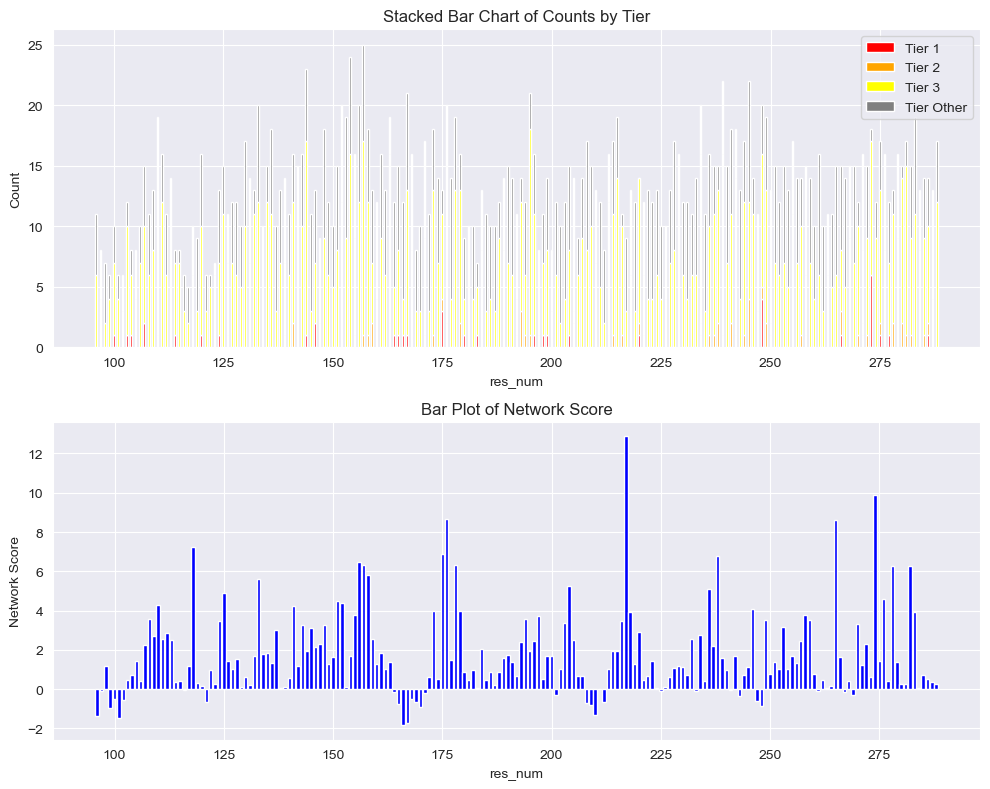

In [19]:
# Sort the DataFrame by res_num
df_sorted = tmp2[tmp2['pdb_id']=='4IBQ'].sort_values(by='res_num')

# Create stacked bar chart
plt.figure(figsize=(10, 8))

# Stacked bar chart
plt.subplot(2, 1, 1)
plt.bar(df_sorted['res_num'], df_sorted['tier1_count'], color='red', label='Tier 1', width=0.4)
plt.bar(df_sorted['res_num'], df_sorted['tier2_count'], bottom=df_sorted['tier1_count'], color='orange', label='Tier 2', width=0.4)
plt.bar(df_sorted['res_num'], df_sorted['tier3_count'], bottom=df_sorted['tier1_count'] + df_sorted['tier2_count'], color='yellow', label='Tier 3', width=0.4)
plt.bar(df_sorted['res_num'], df_sorted['tierOther_count'], bottom=df_sorted['tier1_count'] + df_sorted['tier2_count'] + df_sorted['tier3_count'], color='grey', label='Tier Other', width=0.4)
plt.xlabel('res_num')
plt.ylabel('Count')
plt.title('Stacked Bar Chart of Counts by Tier')
plt.legend()

# Bar plot of network score
plt.subplot(2, 1, 2)
plt.bar(df_sorted['res_num'], df_sorted['network_score'], color='blue')
plt.xlabel('res_num')
plt.ylabel('Network Score')
plt.title('Bar Plot of Network Score')

plt.tight_layout()
plt.show()

In [25]:
df = tmp2[tmp2['pdb_id']=='4IBQ'].sort_values(by='res_num')

# Create stacked bar chart
fig = go.Figure()

# Stacked bar chart
fig.add_trace(go.Bar(x=df['res_num'], y=df['tier1_count'], name='Tier 1', marker_color='red'))
fig.add_trace(go.Bar(x=df['res_num'], y=df['tier2_count'], name='Tier 2', marker_color='orange'))
fig.add_trace(go.Bar(x=df['res_num'], y=df['tier3_count'], name='Tier 3', marker_color='yellow'))
fig.add_trace(go.Bar(x=df['res_num'], y=df['tierOther_count'], name='Tier Other', marker_color='grey'))

# Update layout
fig.update_layout(barmode='stack', xaxis_title='res_num', yaxis_title='Count',
                  title='Stacked Bar Chart of Counts by Tier')

# Bar plot of network score
# fig.add_trace(go.Bar(x=df['res_num'], y=df['network_score'], name='Network Score', marker_color='blue'))

# Update layout
# fig.update_layout(xaxis2_title='res_num', yaxis2_title='Network Score',
#                   title2='Bar Plot of Network Score', yaxis2=dict(anchor='x2'))

fig.show()

# Create stacked bar chart
fig = go.Figure()

# Bar plot of network score
fig.add_trace(go.Bar(x=df['res_num'], y=df['network_score'], name='Network Score', marker_color='blue'))

# Update layout
fig.show()